# Minimizing Risks for Loan Investment
Link to dataset https://www.kaggle.com/wordsforthewise/lending-club

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

Target - loan_status

### Agenda:
#### Loading the data and other imports
#### Overall View

- describe
- head
- info

#### EDA

- countplot (target)
- histograms
- heatmap of correlation
- pairplot(sometimes time-consuming)
- scatterplots
- boxplots

#### Data PreProcessing
- remove or fill any missing data
- remove unnecessary or repetitive features
- convert categorical string features to dummy variables

#### Modeling
- train test split
- normalizing Data MinMaxScaler
- creating Model
- dropout and early stop
- saving model
- evaluating model 

## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  


# Section 1: EDA

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


Let's see if we have balanced target variable

C:\Users\agole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

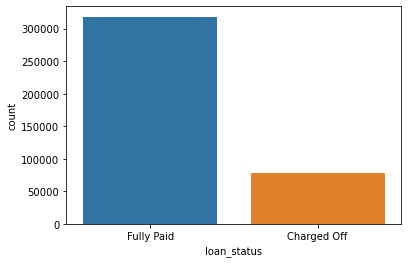

In [6]:
sns.countplot('loan_status' ,data = df)

**Histogram of the loan_amnt column.**

<AxesSubplot:>

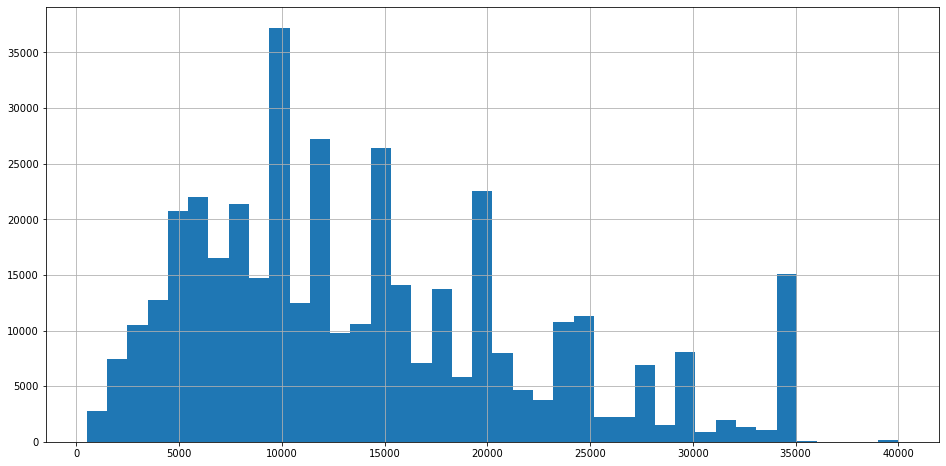

In [7]:
df['loan_amnt'].hist(bins = 40,figsize=(16,8))

**Correlation between the continuous feature variables.**

In [8]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Heatmap**  
We have correlation near 1 between installment and loan_amnt

<AxesSubplot:>

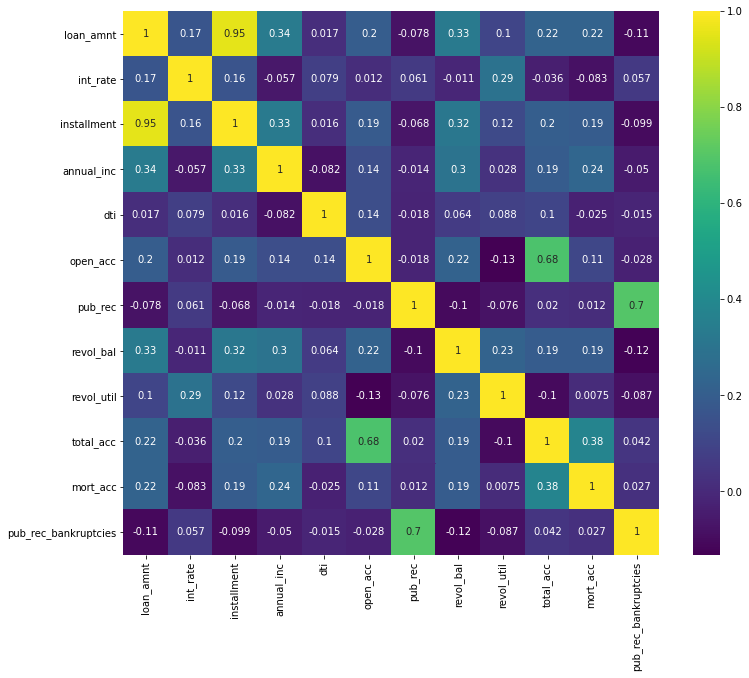

In [9]:
plt.figure(figsize= (12,10))
sns.heatmap(df.corr(),annot=True,cmap = 'viridis')

**Exploring installment & loan_amnt features**

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

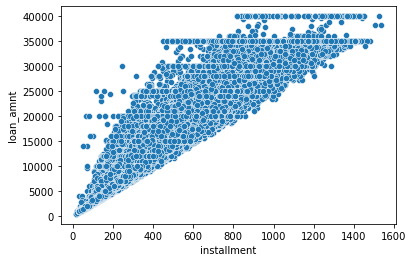

In [10]:
#plt.scatter(x = df['installment'], y = df['loan_amnt'])
sns.scatterplot(x = 'installment', y = 'loan_amnt',data =df)

**Boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

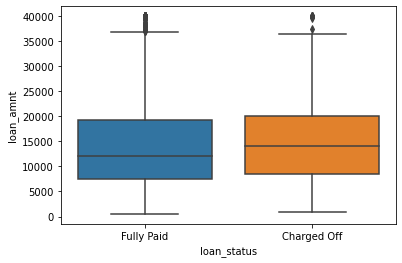

In [11]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt',data = df)

**Summary statistics for the loan amount, grouped by the loan_status.**

In [12]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns**

In [13]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [14]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Countplot per grade with the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

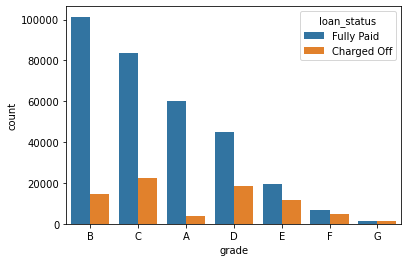

In [15]:
sns.countplot(x='grade' ,data =df , hue= 'loan_status',order = df['grade'].value_counts().index)

**Count plot per subgrade**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

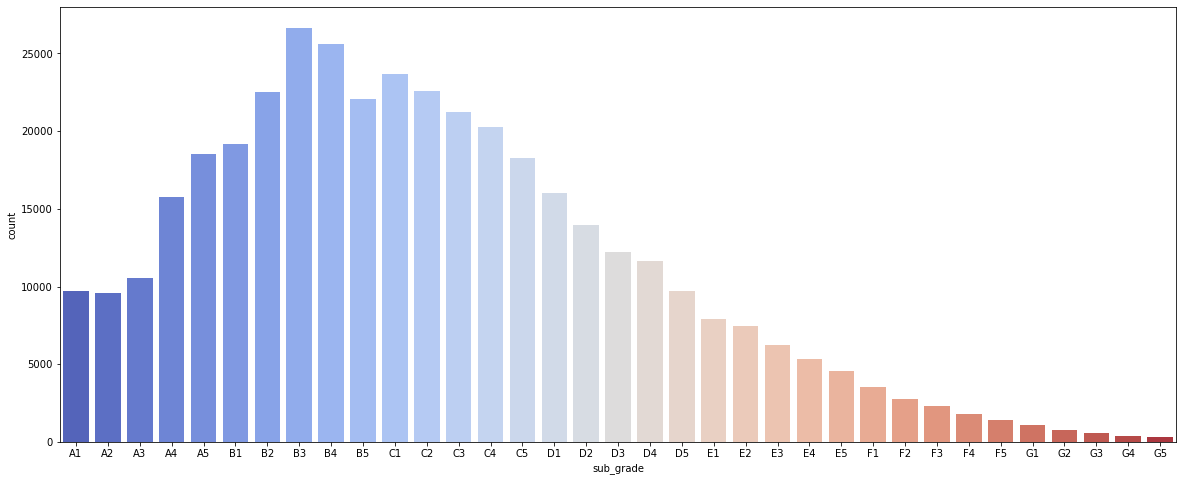

In [16]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'sub_grade',data= df,palette = 'coolwarm',order = sorted(df['sub_grade'].unique()))

**Count plot per subgrade hue by loan_status**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

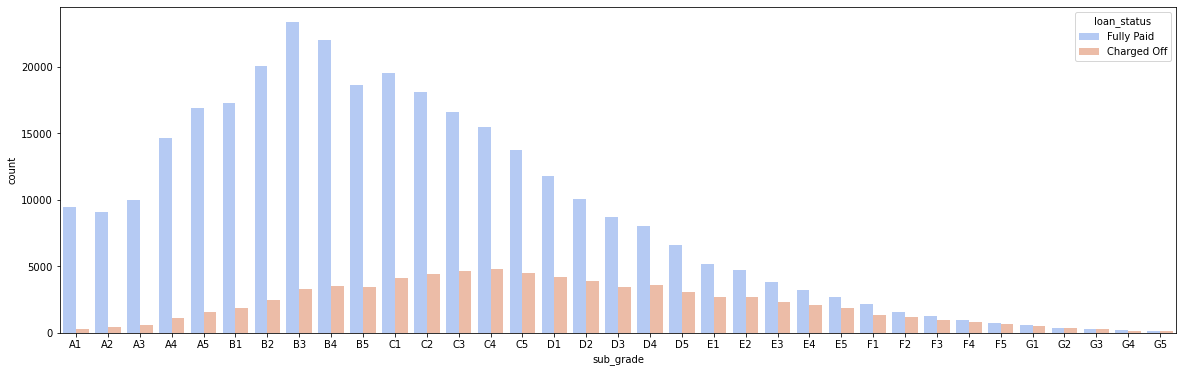

In [17]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'sub_grade',data= df,palette = 'coolwarm',order = sorted(df['sub_grade'].unique()),
             hue = 'loan_status')

**It looks like F and G subgrades don't get paid back that often.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

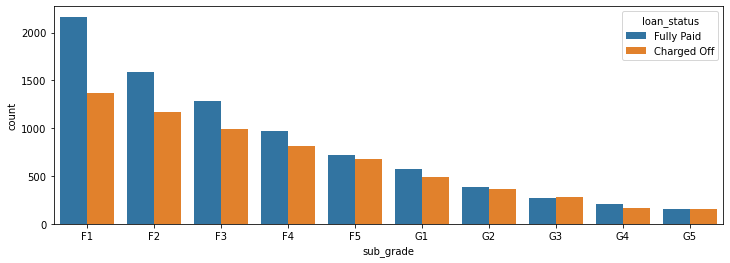

In [18]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**Changing target variable, when "Fully Paid" then 1, when "Charged Off" then 0.**

In [19]:
df.loc[df['loan_status']=='Fully Paid','loan_status'] = 1
df.loc[df['loan_status']=='Charged Off','loan_status'] = 0

In [20]:
df['loan_status'] = df['loan_status'].astype(int)

**Bar plot showing the correlation of the numeric features to the new loan_status column**

<AxesSubplot:>

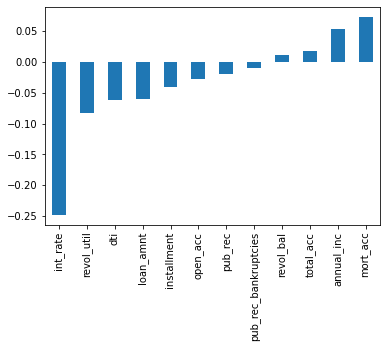

In [21]:
df.corr()['loan_status'].sort_values()[:-1].plot(kind = 'bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [22]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Missing Data

**Let's explore this missing data columns.**

**Length of the dataframe**

In [23]:
len(df)

396030

**Missing values per column.**

In [24]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Percentage of the total DataFrame**

In [25]:
((df.isna().sum()/len(df))*100)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

**emp_title and emp_length**

In [26]:
df['emp_title'].nunique()

173105

In [27]:
df['emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
QA mananger                         1
American Registry                   1
ballys las vegas                    1
VP, Power Supply and Planning       1
Tita's Family Daycare               1
Name: emp_title, Length: 173105, dtype: int64

**There are too many unique job titles to try to convert this to a dummy variable feature.**

In [28]:
df = df.drop('emp_title',axis = 1)

**Count plot of the emp_length feature column.**

In [29]:
#df[df['emp_length'].isna()]['emp_length'] = '0'
df.loc[df['emp_length'].isna(),'emp_length'] = '0'

In [30]:
sorted(df['emp_length'].dropna().unique())

['0',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [31]:
new_order = ['0',
             '< 1 year',
             '1 year',
             '2 years',
             '3 years',
             '4 years',
             '5 years',
             '6 years',
             '7 years',
             '8 years',
             '9 years',
             '10+ years']

C:\Users\agole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

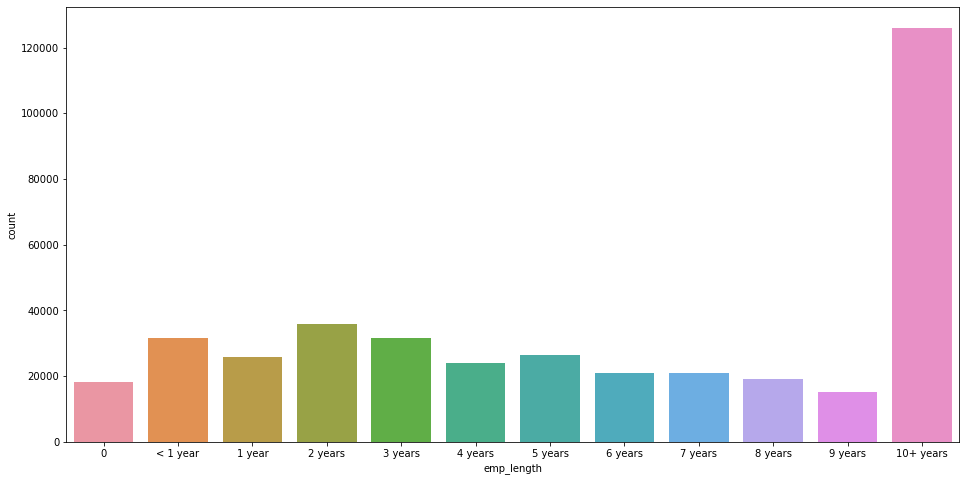

In [32]:
plt.figure(figsize = (16,8))
sns.countplot('emp_length',data = df,order = new_order)

**Countplot with a hue by loan_status**

C:\Users\agole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

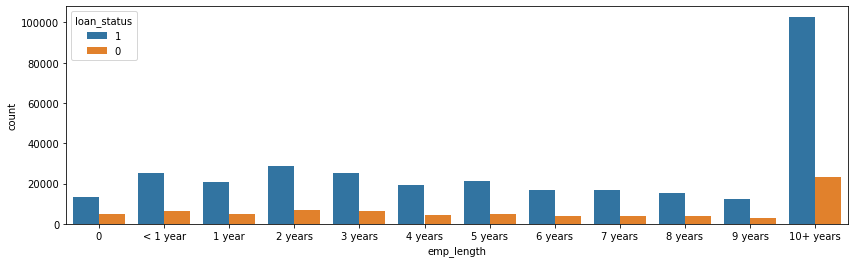

In [33]:
plt.figure(figsize = (14,4))
sns.countplot('emp_length',data = df,order = new_order
             ,hue = 'loan_status',hue_order=[1,0])

In [34]:
occurences_per_emp_len = df.groupby('emp_length').agg('count')['loan_status']#.values
occurences_per_emp_len

emp_length
0             18301
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_status, dtype: int64

In [35]:
chardeg_off_per_group = df[df['loan_status'] == 0].groupby('emp_length').agg('count')['loan_status']#.values
chardeg_off_per_group

emp_length
0             5038
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

<BarContainer object of 12 artists>

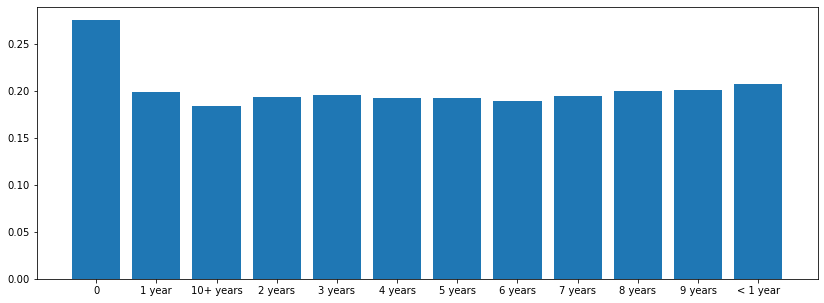

In [36]:
plt.figure(figsize = (14,5))
plt.bar(x = sorted(df['emp_length'].dropna().unique()) , height = chardeg_off_per_group/occurences_per_emp_len)

**Title column vs the purpose column**

In [37]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [38]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column.**

In [39]:
df = df.drop('title',axis = 1)

**Exploring mort_acc feature**

In [40]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [41]:
df['mort_acc'].isna().sum()

37795

In [42]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**There is a correlation between total_acc and mort_acc. Let's group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [43]:
#df['mort_acc'].fillna()
df.groupby('total_acc').aggregate('mean')['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value.**

In [44]:
total_acc_avg = df.groupby('total_acc').aggregate('mean')['mort_acc']

In [45]:
def fill_mort_acc_na (total_acc,mort_acc):
    if (np.isnan(mort_acc)):
        return total_acc_avg[total_acc]
    else:
        return mort_acc  

In [46]:
df['mort_acc'] = df.apply(lambda x : fill_mort_acc_na(x['total_acc'],x['mort_acc']),axis = 1)

In [47]:
df['mort_acc'].isna().sum()

0

In [48]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

**Dropping revol_util and pub_rec_bankruptcies**

In [49]:
df = df.drop(['revol_util','pub_rec_bankruptcies'],axis =1)

In [50]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
dtype: int64

## Categorical Variables and Dummy Variables

In [51]:
df.select_dtypes(include = 'object').columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**term feature**

In [52]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [53]:
df['term'] = df['term'].apply(lambda term : int(term[:3]))

**grade feature**

In [54]:
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
dtype: int64

In [55]:
df = df.drop('grade', axis = 1)

**Converting the subgrade into dummy variables.**

In [56]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [57]:
df = pd.concat([df,sub_grade_dummies],axis = 1)
df = df.drop('sub_grade',axis = 1)
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Jan-2015,1,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,1,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Jan-2015,1,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,6 years,RENT,54000.0,Not Verified,Nov-2014,1,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Apr-2013,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'address', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [59]:
df.select_dtypes(include = 'object').columns

Index(['emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

**Changing emp_length**

In [60]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
0             18301
9 years       15314
Name: emp_length, dtype: int64

In [61]:
import re
def find_number(text):
    num = re.findall(r'\d+',text)
    return num

In [62]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [63]:
df['emp_length'] = pd.DataFrame(df['emp_length'].apply(lambda x: int(find_number(x)[0])))

In [64]:
df.select_dtypes(include = 'object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

**verification_status, application_type,initial_list_status,purpos**

In [65]:
ver_app_ini_pur_dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [66]:
df = pd.concat([ver_app_ini_pur_dummies,df.drop(['verification_status','application_type','initial_list_status','purpose'],axis = 1)],axis=1)

**home_ownership**

In [67]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [68]:
df.loc[df['home_ownership'] == 'NONE','home_ownership'] = 'OTHER'
df.loc[df['home_ownership'] =='ANY','home_ownership'] = 'OTHER'

In [69]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis = 1),home_ownership_dummies],axis = 1) 

**address zip code**

In [70]:
zip_code = df['address'].str[-5:]

In [71]:
zip_code.value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: address, dtype: int64

In [72]:
df = df.drop('address',axis = 1)

In [73]:
zip_code_dummies = pd.get_dummies(zip_code,drop_first=True)
df = pd.concat([df,zip_code_dummies],axis= 1)

**issue_d** 

In [74]:
df = df.drop('issue_d', axis = 1)

**dropping earliest_cr_line**

In [75]:
df['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jun-1955       1
Aug-1958       1
Feb-1957       1
Jul-1955       1
Aug-1960       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [76]:
df = df.drop('earliest_cr_line', axis = 1)

In [77]:
df.dtypes.value_counts()

uint8      64
float64    10
int64       2
int32       1
dtype: int64

## Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop('loan_status',axis = 1).values
y = df['loan_status'].values

In [80]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

396030


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Normalizing the Data

In [82]:
from sklearn.preprocessing import MinMaxScaler
#help(MinMaxScaler)

In [83]:
scaler = MinMaxScaler()

In [84]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
df.shape

(396030, 77)

In [87]:
X_train.shape

(316824, 76)

In [88]:
model = Sequential()

model.add(Dense(77,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.2))

#model.add(Dense(19,activation = 'relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [89]:
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [90]:
model.fit(x = X_train, y = y_train,epochs = 25,validation_data=(X_test,y_test))
          #,callbacks=[early_stop])

Epoch 1/25
9901/9901 [==============================] - 21s 2ms/step - loss: 0.2991 - val_loss: 0.2604
Epoch 2/25
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2635 - val_loss: 0.2608
Epoch 3/25
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2604 - val_loss: 0.2607
Epoch 4/25
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2617 - val_loss: 0.2621
Epoch 5/25
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2600 - val_loss: 0.2591
Epoch 6/25
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2590 - val_loss: 0.2595
Epoch 7/25
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2604 - val_loss: 0.2587
Epoch 8/25
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2598 - val_loss: 0.2589
Epoch 9/25
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2588 - val_loss: 0.2588
Epoch 10/25
9901/9901 [==============================] - 17s 2ms/step - l

**Saving model.**

In [91]:
from tensorflow.keras.models import load_model

In [92]:
model.save('mymodel1.h5')

# Section 3: Evaluating Model.

In [93]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

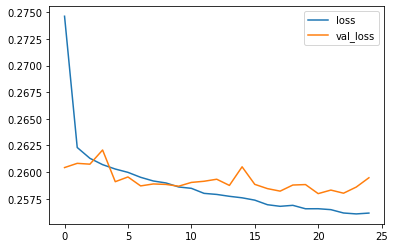

In [94]:
losses.plot()

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
predictions = model.predict_classes(X_test)
predictions

C:\Users\agole\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [97]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 6702  8799]
 [   54 63651]]


              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15501
           1       0.88      1.00      0.93     63705

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206

